In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
!git clone https://github.com/time-series-foundation-models/lag-llama/ 

fatal: destination path 'lag-llama' already exists and is not an empty directory.


In [4]:
cd lag-llama 

/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/test/test_lag_llama/lag-llama


/Users/anthonybolton/Developer/FYP/ts-fm-benchmark-financial/lag_llama_venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
pip install -r requirements.txt --quiet 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
!huggingface-cli download time-series-foundation-models/Lag-Llama lag-llama.ckpt --local-dir weights/

weights/lag-llama.ckpt


In [7]:
pip install yfinance --quiet


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

df_etth2 = pd.read_csv('ETTh2.csv')

In [9]:
df_etth2.drop(columns=['HULL', 'MULL', 'LUFL', 'LULL'], inplace=True)

In [13]:
df_etth2['date'] = pd.to_datetime(df_etth2['date'])

In [22]:
df_etth2

,date,HUFL,MUFL,OT
0,2016-07-01 00:00:00,41.130001,36.535999,38.661999
1,2016-07-01 01:00:00,37.528000,33.936001,37.124001
2,2016-07-01 02:00:00,37.946999,35.330002,36.465000
3,2016-07-01 03:00:00,38.952000,35.543999,33.608501
4,2016-07-01 04:00:00,38.113998,35.410000,31.850500
...,...,...,...,...
17415,2018-06-26 15:00:00,39.202999,49.644001,47.084999
17416,2018-06-26 16:00:00,38.113998,48.759998,48.183498
17417,2018-06-26 17:00:00,39.622002,50.609001,48.183498
17418,2018-06-26 18:00:00,43.643002,54.737000,46.865501


In [279]:
df_etth2.loc[8664, 'date']

Timestamp('2017-06-27 00:00:00')

In [260]:
CONTEXT_WINDOW = 480
target_date = pd.Timestamp('2017-06-27 00:00:00')
# target_date = pd.Timestamp('2017-06-29 00:00:00')
# target_date = pd.Timestamp('2017-07-04 00:00:00')
start_idx = df_etth2[df_etth2['date'] < target_date].index[-1]

current_idx = start_idx + 0
context_start = current_idx - CONTEXT_WINDOW
context_end = current_idx

df_etth2['OT'].iloc[context_start:context_end + 1]

8183    28.555000
8184    28.115000
8185    27.895500
8186    27.676001
8187    27.236000
          ...    
8659    38.442501
8660    37.563499
8661    36.465000
8662    36.025002
8663    35.805500
Name: OT, Length: 481, dtype: float64

In [225]:
foo_df = df_etth2['OT'].iloc[context_start + 1:context_end + 1]
len(foo_df)

480

In [221]:
context_start_date = df_etth2['date'].iloc[context_start]
context_start_date

Timestamp('2017-06-06 23:00:00')

In [216]:
target_date = pd.Timestamp('2017-06-26 23:00:00')

df_etth2[df_etth2['date'] == target_date]

,date,HUFL,MUFL,OT
8663,2017-06-26 23:00:00,30.993999,38.386002,35.8055


# ETT-H2 Diagram 1

Start index: 8663

Forecast Setup Details:
Total data length: 17420
Start index (last point in context window): 8663
Context window size: 480

Step 1 / 25
  Context indices = [8183, 8663]
  Forecast index  = 8663
  Context date range = 2017-06-06 23:00:00 to 2017-06-26 23:00:00
  Forecast date       = 2017-06-27 00:00:00
482
2017-06-06 23:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 35.28, Actual = 35.81

Step 2 / 25
  Context indices = [8184, 8664]
  Forecast index  = 8664
  Context date range = 2017-06-07 00:00:00 to 2017-06-27 00:00:00
  Forecast date       = 2017-06-27 01:00:00
482
2017-06-07 00:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 34.92, Actual = 35.37

Step 3 / 25
  Context indices = [8185, 8665]
  Forecast index  = 8665
  Context date range = 2017-06-07 01:00:00 to 2017-06-27 01:00:00
  Forecast date       = 2017-06-27 02:00:00
482
2017-06-07 01:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 34.45, Actual = 34.93

Step 4 / 25
  Context indices = [8186, 8666]
  Forecast index  = 8666
  Context date range = 2017-06-07 02:00:00 to 2017-06-27 02:00:00
  Forecast date       = 2017-06-27 03:00:00
482
2017-06-07 02:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 34.24, Actual = 34.49

Step 5 / 25
  Context indices = [8187, 8667]
  Forecast index  = 8667
  Context date range = 2017-06-07 03:00:00 to 2017-06-27 03:00:00
  Forecast date       = 2017-06-27 04:00:00
482
2017-06-07 03:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 33.74, Actual = 34.05

Step 6 / 25
  Context indices = [8188, 8668]
  Forecast index  = 8668
  Context date range = 2017-06-07 04:00:00 to 2017-06-27 04:00:00
  Forecast date       = 2017-06-27 05:00:00
482
2017-06-07 04:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 33.56, Actual = 33.83

Step 7 / 25
  Context indices = [8189, 8669]
  Forecast index  = 8669
  Context date range = 2017-06-07 05:00:00 to 2017-06-27 05:00:00
  Forecast date       = 2017-06-27 06:00:00
482
2017-06-07 05:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 33.87, Actual = 33.39

Step 8 / 25
  Context indices = [8190, 8670]
  Forecast index  = 8670
  Context date range = 2017-06-07 06:00:00 to 2017-06-27 06:00:00
  Forecast date       = 2017-06-27 07:00:00
482
2017-06-07 06:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 33.84, Actual = 33.39

Step 9 / 25
  Context indices = [8191, 8671]
  Forecast index  = 8671
  Context date range = 2017-06-07 07:00:00 to 2017-06-27 07:00:00
  Forecast date       = 2017-06-27 08:00:00
482
2017-06-07 07:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 34.47, Actual = 33.39

Step 10 / 25
  Context indices = [8192, 8672]
  Forecast index  = 8672
  Context date range = 2017-06-07 08:00:00 to 2017-06-27 08:00:00
  Forecast date       = 2017-06-27 09:00:00
482
2017-06-07 08:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 35.90, Actual = 34.49

Step 11 / 25
  Context indices = [8193, 8673]
  Forecast index  = 8673
  Context date range = 2017-06-07 09:00:00 to 2017-06-27 09:00:00
  Forecast date       = 2017-06-27 10:00:00
482
2017-06-07 09:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 36.92, Actual = 35.59

Step 12 / 25
  Context indices = [8194, 8674]
  Forecast index  = 8674
  Context date range = 2017-06-07 10:00:00 to 2017-06-27 10:00:00
  Forecast date       = 2017-06-27 11:00:00
482
2017-06-07 10:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 40.17, Actual = 37.56

Step 13 / 25
  Context indices = [8195, 8675]
  Forecast index  = 8675
  Context date range = 2017-06-07 11:00:00 to 2017-06-27 11:00:00
  Forecast date       = 2017-06-27 12:00:00
482
2017-06-07 11:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 42.35, Actual = 40.86

Step 14 / 25
  Context indices = [8196, 8676]
  Forecast index  = 8676
  Context date range = 2017-06-07 12:00:00 to 2017-06-27 12:00:00
  Forecast date       = 2017-06-27 13:00:00
482
2017-06-07 12:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 44.35, Actual = 42.40

Step 15 / 25
  Context indices = [8197, 8677]
  Forecast index  = 8677
  Context date range = 2017-06-07 13:00:00 to 2017-06-27 13:00:00
  Forecast date       = 2017-06-27 14:00:00
482
2017-06-07 13:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 45.69, Actual = 44.59

Step 16 / 25
  Context indices = [8198, 8678]
  Forecast index  = 8678
  Context date range = 2017-06-07 14:00:00 to 2017-06-27 14:00:00
  Forecast date       = 2017-06-27 15:00:00
482
2017-06-07 14:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 46.57, Actual = 45.69

Step 17 / 25
  Context indices = [8199, 8679]
  Forecast index  = 8679
  Context date range = 2017-06-07 15:00:00 to 2017-06-27 15:00:00
  Forecast date       = 2017-06-27 16:00:00
482
2017-06-07 15:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 45.24, Actual = 46.79

Step 18 / 25
  Context indices = [8200, 8680]
  Forecast index  = 8680
  Context date range = 2017-06-07 16:00:00 to 2017-06-27 16:00:00
  Forecast date       = 2017-06-27 17:00:00
482
2017-06-07 16:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 41.20, Actual = 45.47

Step 19 / 25
  Context indices = [8201, 8681]
  Forecast index  = 8681
  Context date range = 2017-06-07 17:00:00 to 2017-06-27 17:00:00
  Forecast date       = 2017-06-27 18:00:00
482
2017-06-07 17:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 40.15, Actual = 42.84

Step 20 / 25
  Context indices = [8202, 8682]
  Forecast index  = 8682
  Context date range = 2017-06-07 18:00:00 to 2017-06-27 18:00:00
  Forecast date       = 2017-06-27 19:00:00
482
2017-06-07 18:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 39.24, Actual = 41.96

Step 21 / 25
  Context indices = [8203, 8683]
  Forecast index  = 8683
  Context date range = 2017-06-07 19:00:00 to 2017-06-27 19:00:00
  Forecast date       = 2017-06-27 20:00:00
482
2017-06-07 19:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 38.57, Actual = 40.86

Step 22 / 25
  Context indices = [8204, 8684]
  Forecast index  = 8684
  Context date range = 2017-06-07 20:00:00 to 2017-06-27 20:00:00
  Forecast date       = 2017-06-27 21:00:00
482
2017-06-07 20:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 38.15, Actual = 39.98

Step 23 / 25
  Context indices = [8205, 8685]
  Forecast index  = 8685
  Context date range = 2017-06-07 21:00:00 to 2017-06-27 21:00:00
  Forecast date       = 2017-06-27 22:00:00
482
2017-06-07 21:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 37.72, Actual = 38.66

Step 24 / 25
  Context indices = [8206, 8686]
  Forecast index  = 8686
  Context date range = 2017-06-07 22:00:00 to 2017-06-27 22:00:00
  Forecast date       = 2017-06-27 23:00:00
482
2017-06-07 22:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 36.86, Actual = 37.78

Step 25 / 25
  Context indices = [8207, 8687]
  Forecast index  = 8687
  Context date range = 2017-06-07 23:00:00 to 2017-06-27 23:00:00
  Forecast date       = 2017-06-28 00:00:00
482
2017-06-07 23:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 36.77, Actual = 37.12

Sliding Window Forecast Metrics:
MAE: 0.4556
MSE: 0.5030
RMSE: 0.7092
MAPE: 1.1485
SMAPE: 1.1618
MASE: N/A


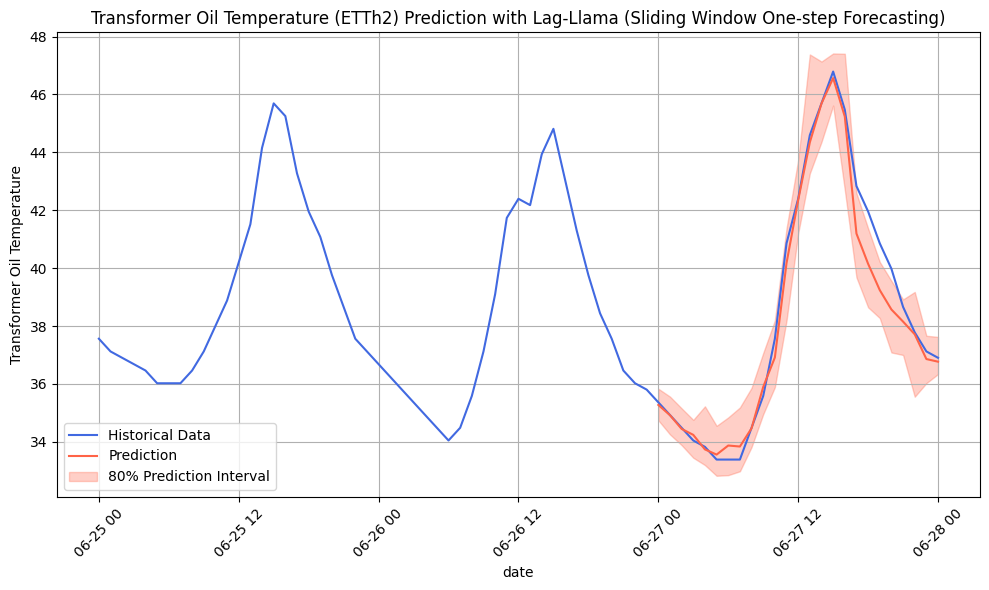

In [327]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from gluonts.dataset.common import ListDataset
from gluonts.evaluation import make_evaluation_predictions
from lag_llama.gluon.estimator import LagLlamaEstimator
from utils_snp.metrics import calculate_metrics

# Best results: 480, 1120, 1152, 1536, 1664， 1600
CONTEXT_WINDOW = 480
FORECAST_STEPS = 25


def get_lag_llama_predictions(
    dataset,
    prediction_length,
    context_length=32,
    use_rope_scaling=False,
    num_samples=100,
):
    ckpt = torch.load(
        "weights/lag-llama.ckpt",
        map_location=torch.device("mps" if torch.mps.is_available() else "cpu"),
    )
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

    rope_scaling_arguments = {
        "type": "linear",
        "factor": max(
            1.0, (context_length + prediction_length) / estimator_args["context_length"]
        ),
    }

    estimator = LagLlamaEstimator(
        ckpt_path="weights/lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length,
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],
        rope_scaling=rope_scaling_arguments if use_rope_scaling else None,
        device=torch.device("mps" if torch.mps.is_available() else "cpu"),
    )

    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset, predictor=predictor, num_samples=num_samples
    )
    forecasts = list(forecast_it)
    tss = list(ts_it)

    return forecasts, tss


def generate_single_forecast(context_data, start_date):
    """Generate a single one-step forecast"""
    # Ensure context_data is 1D
    context_data = np.asarray(context_data).flatten()

    # Create ListDataset for the current context window
    dataset = ListDataset([{"start": start_date, "target": context_data}], freq="1h")

    # Generate forecast
    forecasts, _ = get_lag_llama_predictions(
        dataset=dataset,
        prediction_length=1,  # One-step forecast
        context_length=CONTEXT_WINDOW,
        use_rope_scaling=True,
        num_samples=20,
    )

    forecast_samples = forecasts[0].samples

    # Extract quantilesss
    low, median, high = np.percentile(forecast_samples, [10, 50, 90], axis=0)
    return low[0], median[0], high[0]  # Return single values instead of arrays


def generate_sliding_window_forecasts(data, start_idx):
    """Generate forecasts using sliding window approach with corrected date alignment"""
    print(f"\nForecast Setup Details:")
    print(f"Total data length: {len(data)}")
    print(f"Start index (last point in context window): {start_idx}")
    print(f"Context window size: {CONTEXT_WINDOW}")

    all_forecasts = {
        "median": [], 
        "low": [], 
        "high": [], 
        "dates": [],
        }

    for i in range(FORECAST_STEPS):
        current_idx = start_idx + i
        context_start = current_idx - CONTEXT_WINDOW
        context_end = current_idx

        print(f"\nStep {i+1} / {FORECAST_STEPS}")
        print(f"  Context indices = [{context_start}, {context_end}]")
        print(f"  Forecast index  = {current_idx}")
        print(
            f"  Context date range = {data['date'].iloc[context_start]} "
            f"to {data['date'].iloc[context_end]}"
        )
        print(
            f"  Forecast date       = {data['date'].iloc[current_idx + 1]}"
        )  

        context_data = data["OT"].iloc[context_start + 1: context_end + 3].to_numpy()
        print(len(context_data))
        context_start_date = data["date"].iloc[context_start]
        print(context_start_date)
        low, median, high = generate_single_forecast(context_data, context_start_date)

        if current_idx + 1 < len(data):
            actual_val = data["OT"].iloc[current_idx]
            print(f"  Forecast median = {median:.2f}, Actual = {actual_val:.2f}")

        all_forecasts["median"].append(median)
        all_forecasts["low"].append(low)
        all_forecasts["high"].append(high)
        all_forecasts["dates"].append(
            data["date"].iloc[current_idx + 1]
        )  # Store the next timestamp

    return all_forecasts


def plot_forecast_with_sliding_window(data, start_idx, forecasts):
    """Modified plotting function for sliding window forecasts with corrected alignment"""
    plt.figure(figsize=(10, 6))

    # context_data = data.iloc[start_idx - 47 : start_idx + FORECAST_STEPS + 1]
    context_data = data.iloc[start_idx - 47 : start_idx + FORECAST_STEPS + 1]

    plt.plot(
        context_data["date"],
        context_data["OT"],
        color="royalblue",
        label="Historical Data",
    )

    # Plot forecasts
    forecast_dates = forecasts["dates"]
    plt.plot(forecast_dates, forecasts["median"], color="tomato", label="Prediction")
    plt.fill_between(
        forecast_dates,
        forecasts["low"],
        forecasts["high"],
        color="tomato",
        alpha=0.3,
        label="80% Prediction Interval",
    )

    plt.xlabel("date")
    plt.ylabel("Transformer Oil Temperature")
    plt.title(
        "Transformer Oil Temperature (ETTh2) Prediction with Lag-Llama (Sliding Window One-step Forecasting)"
    )
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def calculate_sliding_window_metrics(actual_values, predicted_values):
    """Calculate metrics for sliding window predictions"""
    metrics = calculate_metrics(actual_values, predicted_values, insample=None)
    return metrics


etth2 = df_etth2.reset_index()[["date", "OT"]]
etth2["date"] = pd.to_datetime(etth2["date"])

target_date = pd.Timestamp("2017-06-27 00:00:00")
# target_date = pd.Timestamp('2017-06-29 00:00:00')
# target_date = pd.Timestamp('2017-07-04 00:00:00')
start_idx = etth2[etth2["date"] < target_date].index[-1]
print(f"Start index: {start_idx}")
# Generate forecasts using sliding window
forecasts = generate_sliding_window_forecasts(etth2, start_idx)

actual_values = etth2["OT"].iloc[start_idx + 1: start_idx + FORECAST_STEPS + 1].values
metrics = calculate_sliding_window_metrics(actual_values, forecasts["median"])

print("\nSliding Window Forecast Metrics:")
for metric_name, value in metrics.items():
    if value is not None:
        print(f"{metric_name}: {value:.4f}")
    else:
        print(f"{metric_name}: N/A")

plot_forecast_with_sliding_window(etth2, start_idx, forecasts)

Last context window end: 2017-06-26 23:00:00
First forecast position: 2017-06-27 00:00:00



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 1: Context: 2017-06-06 23:00:00 to 2017-06-26 22:00:00
Forecasting for: 2017-06-26 23:00:00 | Actual: 35.81



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 2: Context: 2017-06-07 00:00:00 to 2017-06-26 23:00:00
Forecasting for: 2017-06-27 00:00:00 | Actual: 35.37



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 3: Context: 2017-06-07 01:00:00 to 2017-06-27 00:00:00
Forecasting for: 2017-06-27 01:00:00 | Actual: 34.93



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 4: Context: 2017-06-07 02:00:00 to 2017-06-27 01:00:00
Forecasting for: 2017-06-27 02:00:00 | Actual: 34.49



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 5: Context: 2017-06-07 03:00:00 to 2017-06-27 02:00:00
Forecasting for: 2017-06-27 03:00:00 | Actual: 34.05



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 6: Context: 2017-06-07 04:00:00 to 2017-06-27 03:00:00
Forecasting for: 2017-06-27 04:00:00 | Actual: 33.83



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 7: Context: 2017-06-07 05:00:00 to 2017-06-27 04:00:00
Forecasting for: 2017-06-27 05:00:00 | Actual: 33.39



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 8: Context: 2017-06-07 06:00:00 to 2017-06-27 05:00:00
Forecasting for: 2017-06-27 06:00:00 | Actual: 33.39



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 9: Context: 2017-06-07 07:00:00 to 2017-06-27 06:00:00
Forecasting for: 2017-06-27 07:00:00 | Actual: 33.39



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 10: Context: 2017-06-07 08:00:00 to 2017-06-27 07:00:00
Forecasting for: 2017-06-27 08:00:00 | Actual: 34.49



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 11: Context: 2017-06-07 09:00:00 to 2017-06-27 08:00:00
Forecasting for: 2017-06-27 09:00:00 | Actual: 35.59



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 12: Context: 2017-06-07 10:00:00 to 2017-06-27 09:00:00
Forecasting for: 2017-06-27 10:00:00 | Actual: 37.56



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 13: Context: 2017-06-07 11:00:00 to 2017-06-27 10:00:00
Forecasting for: 2017-06-27 11:00:00 | Actual: 40.86



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 14: Context: 2017-06-07 12:00:00 to 2017-06-27 11:00:00
Forecasting for: 2017-06-27 12:00:00 | Actual: 42.40



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 15: Context: 2017-06-07 13:00:00 to 2017-06-27 12:00:00
Forecasting for: 2017-06-27 13:00:00 | Actual: 44.59



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 16: Context: 2017-06-07 14:00:00 to 2017-06-27 13:00:00
Forecasting for: 2017-06-27 14:00:00 | Actual: 45.69



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 17: Context: 2017-06-07 15:00:00 to 2017-06-27 14:00:00
Forecasting for: 2017-06-27 15:00:00 | Actual: 46.79



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 18: Context: 2017-06-07 16:00:00 to 2017-06-27 15:00:00
Forecasting for: 2017-06-27 16:00:00 | Actual: 45.47



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 19: Context: 2017-06-07 17:00:00 to 2017-06-27 16:00:00
Forecasting for: 2017-06-27 17:00:00 | Actual: 42.84



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 20: Context: 2017-06-07 18:00:00 to 2017-06-27 17:00:00
Forecasting for: 2017-06-27 18:00:00 | Actual: 41.96



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 21: Context: 2017-06-07 19:00:00 to 2017-06-27 18:00:00
Forecasting for: 2017-06-27 19:00:00 | Actual: 40.86



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 22: Context: 2017-06-07 20:00:00 to 2017-06-27 19:00:00
Forecasting for: 2017-06-27 20:00:00 | Actual: 39.98



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 23: Context: 2017-06-07 21:00:00 to 2017-06-27 20:00:00
Forecasting for: 2017-06-27 21:00:00 | Actual: 38.66



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 24: Context: 2017-06-07 22:00:00 to 2017-06-27 21:00:00
Forecasting for: 2017-06-27 22:00:00 | Actual: 37.78



/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/4034900005.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

Step 25: Context: 2017-06-07 23:00:00 to 2017-06-27 22:00:00
Forecasting for: 2017-06-27 23:00:00 | Actual: 37.12


Validation Metrics:
MAE: 0.8819
MSE: 1.5207
RMSE: 1.2332
MAPE: 2.2000
SMAPE: 2.2324
MASE: N/A


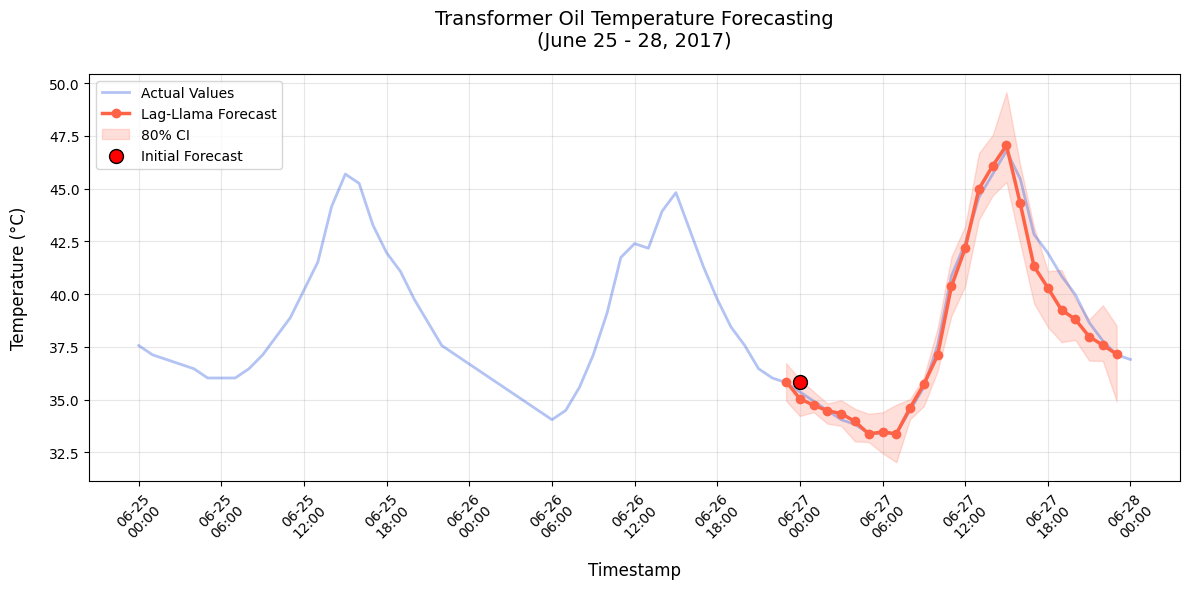

In [325]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from gluonts.dataset.common import ListDataset
from gluonts.evaluation import make_evaluation_predictions
from lag_llama.gluon.estimator import LagLlamaEstimator
from utils_snp.metrics import calculate_metrics
from gluonts.torch.distributions.studentT import StudentTOutput
import torch.serialization
torch.serialization.add_safe_globals([StudentTOutput])

# Configuration for hourly data
CONTEXT_WINDOW = 480  # 480 hours = 20 days of history
FORECAST_STEPS = 25   # 25 hours forecast horizon

def get_lag_llama_predictions(
    dataset,
    prediction_length,
    context_length=32,
    use_rope_scaling=False,
    num_samples=100,
):
    ckpt = torch.load(
        "weights/lag-llama.ckpt",
        map_location=torch.device("mps" if torch.mps.is_available() else "cpu"),
    )
    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

    rope_scaling_arguments = {
        "type": "linear",
        "factor": max(
            1.0, (context_length + prediction_length) / estimator_args["context_length"]
        ),
    }

    estimator = LagLlamaEstimator(
        ckpt_path="weights/lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length,
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],
        rope_scaling=rope_scaling_arguments if use_rope_scaling else None,
        device=torch.device("mps" if torch.mps.is_available() else "cpu"),
    )

    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset, predictor=predictor, num_samples=num_samples
    )
    return list(forecast_it), list(ts_it)

def generate_single_forecast(context_data, start_date):
    """Generate hourly one-step forecast with proper alignment"""
    dataset = ListDataset(
        [{"start": start_date, "target": context_data.reshape(-1)}],
        freq="1h"
    )

    forecasts, _ = get_lag_llama_predictions(
        dataset=dataset,
        prediction_length=1,
        context_length=CONTEXT_WINDOW,
        use_rope_scaling=True,
        num_samples=20,
    )

    forecast_samples = forecasts[0].samples
    low, median, high = np.percentile(forecast_samples, [10, 50, 90], axis=0)
    return low[0], median[0], high[0]

def generate_sliding_window_forecasts(data, start_idx):
    """Correct sliding window implementation with temporal alignment"""
    assert start_idx >= CONTEXT_WINDOW, f"Need at least {CONTEXT_WINDOW} historical points"
    assert start_idx + FORECAST_STEPS < len(data), "Forecast horizon exceeds data length"

    all_forecasts = {"median": [], "low": [], "high": [], "dates": []}

    for i in range(FORECAST_STEPS):
        # Current context window ends at start_idx + i
        context_end = start_idx + i - 1
        context_start = context_end - CONTEXT_WINDOW + 1
        
        # Forecast position is next timestamp after context window
        forecast_position = context_end + 1

        context_data = data["OT"].iloc[context_start:context_end + 3].values
        context_start_date = data["date"].iloc[context_start]
        
        low, median, high = generate_single_forecast(context_data, context_start_date)

        forecast_date = data["date"].iloc[forecast_position]
        all_forecasts["median"].append(median)
        all_forecasts["low"].append(low)
        all_forecasts["high"].append(high)
        all_forecasts["dates"].append(forecast_date)

        print(f"Step {i+1}: Context: {data['date'].iloc[context_start]} to {data['date'].iloc[context_end]}")
        print(f"Forecasting for: {forecast_date} | Actual: {data['OT'].iloc[forecast_position]:.2f}\n")

    return all_forecasts

def calculate_sliding_window_metrics(actual_values, predicted_values):
    """Robust metric calculation with validation"""
    metrics = {}
    if len(actual_values) != len(predicted_values):
        print(f"Warning: Mismatched lengths - Actual: {len(actual_values)}, Predicted: {len(predicted_values)}")
        return metrics
    
    if len(actual_values) == 0:
        print("Error: No actual values to compare")
        return metrics

    try:
        metrics = calculate_metrics(actual_values, predicted_values, insample=None)
        return {k: float(v) if v is not None else float('nan') for k, v in metrics.items()}
    except Exception as e:
        print(f"Metric calculation failed: {str(e)}")
        return {}

def plot_forecast_with_sliding_window_1(data, forecasts):
    """Paper-style visualization with full background series"""
    plt.figure(figsize=(12, 6))

    # Plot full background series (June 25 - 28)
    full_start = pd.Timestamp("2017-06-25 00:00:00")
    full_end = pd.Timestamp("2017-06-28 00:00:00")
    mask = (data["date"] >= full_start) & (data["date"] <= full_end)
    background_data = data.loc[mask]
    
    plt.plot(
        background_data["date"],
        background_data["OT"],
        color="royalblue",
        alpha=0.4,
        linewidth=2,
        label="Actual Values"
    )

    # Plot forecasts
    forecast_dates = forecasts["dates"]
    plt.plot(
        forecast_dates, 
        forecasts["median"], 
        color="tomato", 
        linewidth=2.5,
        marker='o',
        markersize=6,
        label="Lag-Llama Forecast"
    )
    plt.fill_between(
        forecast_dates,
        forecasts["low"],
        forecasts["high"],
        color="tomato",
        alpha=0.2,
        label="80% CI"
    )

    # Highlight first forecast point
    first_forecast_date = pd.Timestamp("2017-06-27 00:00:00")
    plt.scatter(
        [first_forecast_date],
        [forecasts["median"][0]],
        color="red",
        s=100,
        zorder=5,
        edgecolor='black',
        label="Initial Forecast"
    )

    plt.title("Transformer Oil Temperature Forecasting\n(June 25 - 28, 2017)", fontsize=14, pad=20)
    plt.xlabel("Timestamp", fontsize=12, labelpad=15)
    plt.ylabel("Temperature (°C)", fontsize=12, labelpad=15)
    
    # Format x-axis ticks
    date_range = pd.date_range(start=full_start, end=full_end, freq="6H")
    plt.xticks(date_range, [dt.strftime("%m-%d\n%H:%M") for dt in date_range], rotation=45)
    
    plt.grid(True, alpha=0.3)
    plt.legend(loc="upper left", frameon=True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Load and prepare data
    etth2 = df_etth2.reset_index()[["date", "OT"]]
    etth2["date"] = pd.to_datetime(etth2["date"])

    # Set forecast starting point for June 27 00:00:00
    target_date = pd.Timestamp("2017-06-27 00:00:00")
    start_idx = etth2[etth2["date"] < target_date].index[-1]
    
    print(f"Last context window end: {etth2['date'].iloc[start_idx]}")
    print(f"First forecast position: {etth2['date'].iloc[start_idx + 1]}\n")
    
    # Generate forecasts
    forecasts = generate_sliding_window_forecasts(etth2, start_idx)
    
    # Calculate metrics
    actual_values = etth2["OT"].iloc[start_idx+1:start_idx+FORECAST_STEPS+1].values
    metrics = calculate_sliding_window_metrics(actual_values, forecasts["median"])
    
    # Print metrics
    print("\nValidation Metrics:")
    for metric, value in metrics.items():
        if not np.isnan(value):
            print(f"{metric}: {value:.4f}")
        else:
            print(f"{metric}: N/A")

    # Plot results
    plot_forecast_with_sliding_window_1(etth2, forecasts)

In [314]:
# After generating forecasts, check:
print(f"\nFirst forecast date: {forecasts['dates'][0]}")
print(f"First forecast value: {forecasts['median'][0]:.2f}")
print(f"Actual value at {forecasts['dates'][0]}: {etth2[etth2['date'] == forecasts['dates'][0]]['OT'].values[0]:.2f}")


First forecast date: 2017-06-26 23:00:00
First forecast value: 35.97
Actual value at 2017-06-26 23:00:00: 35.81


In [276]:
len(forecasts['median'])

25

In [277]:
len(actual_values)

26

# ETT-H2 Diagram 2

Start index: 8711

Forecast Setup Details:
Total data length: 17420
Start index (last point in context window): 8711
Context window size: 480

Step 1 / 25
  Context indices = [8231, 8711]
  Forecast index  = 8711
  Context date range = 2017-06-08 23:00:00 to 2017-06-28 23:00:00
  Forecast date       = 2017-06-29 00:00:00
482
2017-06-08 23:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 36.56, Actual = 36.90

Step 2 / 25
  Context indices = [8232, 8712]
  Forecast index  = 8712
  Context date range = 2017-06-09 00:00:00 to 2017-06-29 00:00:00
  Forecast date       = 2017-06-29 01:00:00
482
2017-06-09 00:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 35.63, Actual = 36.47

Step 3 / 25
  Context indices = [8233, 8713]
  Forecast index  = 8713
  Context date range = 2017-06-09 01:00:00 to 2017-06-29 01:00:00
  Forecast date       = 2017-06-29 02:00:00
482
2017-06-09 01:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 35.08, Actual = 35.81

Step 4 / 25
  Context indices = [8234, 8714]
  Forecast index  = 8714
  Context date range = 2017-06-09 02:00:00 to 2017-06-29 02:00:00
  Forecast date       = 2017-06-29 03:00:00
482
2017-06-09 02:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 34.91, Actual = 35.37

Step 5 / 25
  Context indices = [8235, 8715]
  Forecast index  = 8715
  Context date range = 2017-06-09 03:00:00 to 2017-06-29 03:00:00
  Forecast date       = 2017-06-29 04:00:00
482
2017-06-09 03:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 34.61, Actual = 34.93

Step 6 / 25
  Context indices = [8236, 8716]
  Forecast index  = 8716
  Context date range = 2017-06-09 04:00:00 to 2017-06-29 04:00:00
  Forecast date       = 2017-06-29 05:00:00
482
2017-06-09 04:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 34.82, Actual = 34.71

Step 7 / 25
  Context indices = [8237, 8717]
  Forecast index  = 8717
  Context date range = 2017-06-09 05:00:00 to 2017-06-29 05:00:00
  Forecast date       = 2017-06-29 06:00:00
482
2017-06-09 05:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 34.21, Actual = 34.49

Step 8 / 25
  Context indices = [8238, 8718]
  Forecast index  = 8718
  Context date range = 2017-06-09 06:00:00 to 2017-06-29 06:00:00
  Forecast date       = 2017-06-29 07:00:00
482
2017-06-09 06:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 34.55, Actual = 34.05

Step 9 / 25
  Context indices = [8239, 8719]
  Forecast index  = 8719
  Context date range = 2017-06-09 07:00:00 to 2017-06-29 07:00:00
  Forecast date       = 2017-06-29 08:00:00
482
2017-06-09 07:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 35.02, Actual = 34.05

Step 10 / 25
  Context indices = [8240, 8720]
  Forecast index  = 8720
  Context date range = 2017-06-09 08:00:00 to 2017-06-29 08:00:00
  Forecast date       = 2017-06-29 09:00:00
482
2017-06-09 08:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 36.13, Actual = 35.15

Step 11 / 25
  Context indices = [8241, 8721]
  Forecast index  = 8721
  Context date range = 2017-06-09 09:00:00 to 2017-06-29 09:00:00
  Forecast date       = 2017-06-29 10:00:00
482
2017-06-09 09:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 38.30, Actual = 37.12

Step 12 / 25
  Context indices = [8242, 8722]
  Forecast index  = 8722
  Context date range = 2017-06-09 10:00:00 to 2017-06-29 10:00:00
  Forecast date       = 2017-06-29 11:00:00
482
2017-06-09 10:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 40.10, Actual = 39.32

Step 13 / 25
  Context indices = [8243, 8723]
  Forecast index  = 8723
  Context date range = 2017-06-09 11:00:00 to 2017-06-29 11:00:00
  Forecast date       = 2017-06-29 12:00:00
482
2017-06-09 11:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 42.93, Actual = 41.52

Step 14 / 25
  Context indices = [8244, 8724]
  Forecast index  = 8724
  Context date range = 2017-06-09 12:00:00 to 2017-06-29 12:00:00
  Forecast date       = 2017-06-29 13:00:00
482
2017-06-09 12:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 43.98, Actual = 43.50

Step 15 / 25
  Context indices = [8245, 8725]
  Forecast index  = 8725
  Context date range = 2017-06-09 13:00:00 to 2017-06-29 13:00:00
  Forecast date       = 2017-06-29 14:00:00
482
2017-06-09 13:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 46.37, Actual = 44.60

Step 16 / 25
  Context indices = [8246, 8726]
  Forecast index  = 8726
  Context date range = 2017-06-09 14:00:00 to 2017-06-29 14:00:00
  Forecast date       = 2017-06-29 15:00:00
482
2017-06-09 14:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 45.62, Actual = 46.35

Step 17 / 25
  Context indices = [8247, 8727]
  Forecast index  = 8727
  Context date range = 2017-06-09 15:00:00 to 2017-06-29 15:00:00
  Forecast date       = 2017-06-29 16:00:00
482
2017-06-09 15:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 43.32, Actual = 46.35

Step 18 / 25
  Context indices = [8248, 8728]
  Forecast index  = 8728
  Context date range = 2017-06-09 16:00:00 to 2017-06-29 16:00:00
  Forecast date       = 2017-06-29 17:00:00
482
2017-06-09 16:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 41.35, Actual = 45.03

Step 19 / 25
  Context indices = [8249, 8729]
  Forecast index  = 8729
  Context date range = 2017-06-09 17:00:00 to 2017-06-29 17:00:00
  Forecast date       = 2017-06-29 18:00:00
482
2017-06-09 17:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 40.27, Actual = 43.94

Step 20 / 25
  Context indices = [8250, 8730]
  Forecast index  = 8730
  Context date range = 2017-06-09 18:00:00 to 2017-06-29 18:00:00
  Forecast date       = 2017-06-29 19:00:00
482
2017-06-09 18:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 39.46, Actual = 42.40

Step 21 / 25
  Context indices = [8251, 8731]
  Forecast index  = 8731
  Context date range = 2017-06-09 19:00:00 to 2017-06-29 19:00:00
  Forecast date       = 2017-06-29 20:00:00
482
2017-06-09 19:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 38.39, Actual = 41.30

Step 22 / 25
  Context indices = [8252, 8732]
  Forecast index  = 8732
  Context date range = 2017-06-09 20:00:00 to 2017-06-29 20:00:00
  Forecast date       = 2017-06-29 21:00:00
482
2017-06-09 20:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 37.89, Actual = 40.20

Step 23 / 25
  Context indices = [8253, 8733]
  Forecast index  = 8733
  Context date range = 2017-06-09 21:00:00 to 2017-06-29 21:00:00
  Forecast date       = 2017-06-29 22:00:00
482
2017-06-09 21:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 37.58, Actual = 39.32

Step 24 / 25
  Context indices = [8254, 8734]
  Forecast index  = 8734
  Context date range = 2017-06-09 22:00:00 to 2017-06-29 22:00:00
  Forecast date       = 2017-06-29 23:00:00
482
2017-06-09 22:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 37.69, Actual = 38.66

Step 25 / 25
  Context indices = [8255, 8735]
  Forecast index  = 8735
  Context date range = 2017-06-09 23:00:00 to 2017-06-29 23:00:00
  Forecast date       = 2017-06-30 00:00:00
482
2017-06-09 23:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 37.26, Actual = 38.44

Sliding Window Forecast Metrics:
MAE: 0.8494
MSE: 1.2378
RMSE: 1.1126
MAPE: 2.0858
SMAPE: 2.1210
MASE: N/A


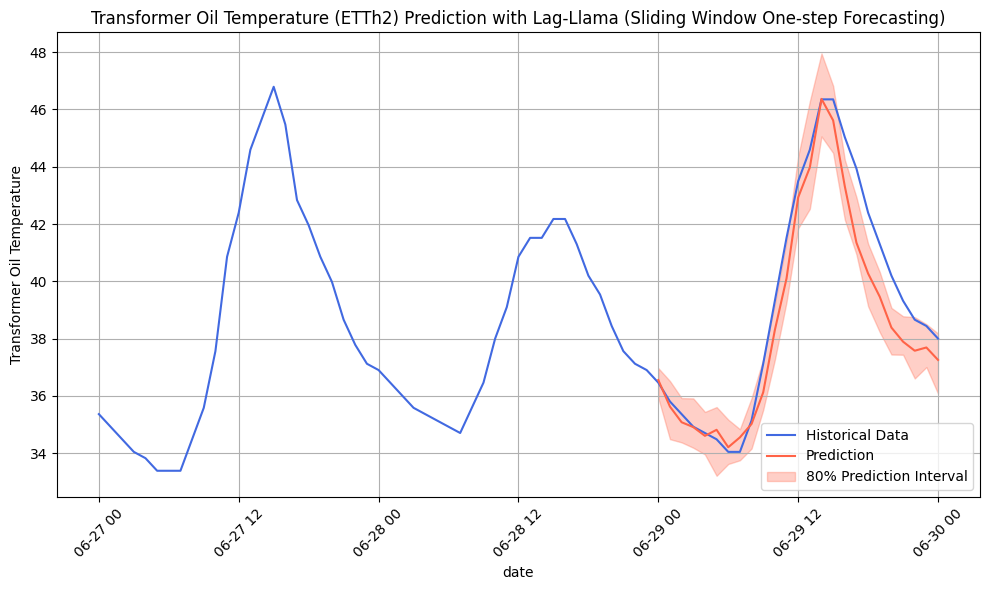

In [331]:
CONTEXT_WINDOW = 480
FORECAST_STEPS = 25

# target_date = pd.Timestamp('2017-06-27 00:00:00')
target_date = pd.Timestamp("2017-06-29 00:00:00")
# target_date = pd.Timestamp('2017-07-04 00:00:00')
start_idx = etth2[etth2["date"] < target_date].index[-1]
print(f"Start index: {start_idx}")
# Generate forecasts using sliding window
forecasts = generate_sliding_window_forecasts(etth2, start_idx)

actual_values = etth2["OT"].iloc[start_idx + 1: start_idx + FORECAST_STEPS + 1].values
metrics = calculate_sliding_window_metrics(actual_values, forecasts["median"])

print("\nSliding Window Forecast Metrics:")
for metric_name, value in metrics.items():
    if value is not None:
        print(f"{metric_name}: {value:.4f}")
    else:
        print(f"{metric_name}: N/A")

plot_forecast_with_sliding_window(etth2, start_idx, forecasts)

# ETT-H2 Diagram 3

Start index: 8831

Forecast Setup Details:
Total data length: 17420
Start index (last point in context window): 8831
Context window size: 480

Step 1 / 25
  Context indices = [8351, 8831]
  Forecast index  = 8831
  Context date range = 2017-06-13 23:00:00 to 2017-07-03 23:00:00
  Forecast date       = 2017-07-04 00:00:00
482
2017-06-13 23:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 37.02, Actual = 36.68

Step 2 / 25
  Context indices = [8352, 8832]
  Forecast index  = 8832
  Context date range = 2017-06-14 00:00:00 to 2017-07-04 00:00:00
  Forecast date       = 2017-07-04 01:00:00
482
2017-06-14 00:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 36.55, Actual = 36.24

Step 3 / 25
  Context indices = [8353, 8833]
  Forecast index  = 8833
  Context date range = 2017-06-14 01:00:00 to 2017-07-04 01:00:00
  Forecast date       = 2017-07-04 02:00:00
482
2017-06-14 01:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 35.92, Actual = 36.03

Step 4 / 25
  Context indices = [8354, 8834]
  Forecast index  = 8834
  Context date range = 2017-06-14 02:00:00 to 2017-07-04 02:00:00
  Forecast date       = 2017-07-04 03:00:00
482
2017-06-14 02:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 35.36, Actual = 35.81

Step 5 / 25
  Context indices = [8355, 8835]
  Forecast index  = 8835
  Context date range = 2017-06-14 03:00:00 to 2017-07-04 03:00:00
  Forecast date       = 2017-07-04 04:00:00
482
2017-06-14 03:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 36.15, Actual = 35.59

Step 6 / 25
  Context indices = [8356, 8836]
  Forecast index  = 8836
  Context date range = 2017-06-14 04:00:00 to 2017-07-04 04:00:00
  Forecast date       = 2017-07-04 05:00:00
482
2017-06-14 04:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 35.71, Actual = 35.37

Step 7 / 25
  Context indices = [8357, 8837]
  Forecast index  = 8837
  Context date range = 2017-06-14 05:00:00 to 2017-07-04 05:00:00
  Forecast date       = 2017-07-04 06:00:00
482
2017-06-14 05:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 35.60, Actual = 35.37

Step 8 / 25
  Context indices = [8358, 8838]
  Forecast index  = 8838
  Context date range = 2017-06-14 06:00:00 to 2017-07-04 06:00:00
  Forecast date       = 2017-07-04 07:00:00
482
2017-06-14 06:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 35.94, Actual = 35.37

Step 9 / 25
  Context indices = [8359, 8839]
  Forecast index  = 8839
  Context date range = 2017-06-14 07:00:00 to 2017-07-04 07:00:00
  Forecast date       = 2017-07-04 08:00:00
482
2017-06-14 07:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 37.34, Actual = 35.59

Step 10 / 25
  Context indices = [8360, 8840]
  Forecast index  = 8840
  Context date range = 2017-06-14 08:00:00 to 2017-07-04 08:00:00
  Forecast date       = 2017-07-04 09:00:00
482
2017-06-14 08:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 38.96, Actual = 37.56

Step 11 / 25
  Context indices = [8361, 8841]
  Forecast index  = 8841
  Context date range = 2017-06-14 09:00:00 to 2017-07-04 09:00:00
  Forecast date       = 2017-07-04 10:00:00
482
2017-06-14 09:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 40.17, Actual = 39.32

Step 12 / 25
  Context indices = [8362, 8842]
  Forecast index  = 8842
  Context date range = 2017-06-14 10:00:00 to 2017-07-04 10:00:00
  Forecast date       = 2017-07-04 11:00:00
482
2017-06-14 10:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 42.26, Actual = 40.20

Step 13 / 25
  Context indices = [8363, 8843]
  Forecast index  = 8843
  Context date range = 2017-06-14 11:00:00 to 2017-07-04 11:00:00
  Forecast date       = 2017-07-04 12:00:00
482
2017-06-14 11:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 43.64, Actual = 42.40

Step 14 / 25
  Context indices = [8364, 8844]
  Forecast index  = 8844
  Context date range = 2017-06-14 12:00:00 to 2017-07-04 12:00:00
  Forecast date       = 2017-07-04 13:00:00
482
2017-06-14 12:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 46.47, Actual = 43.94

Step 15 / 25
  Context indices = [8365, 8845]
  Forecast index  = 8845
  Context date range = 2017-06-14 13:00:00 to 2017-07-04 13:00:00
  Forecast date       = 2017-07-04 14:00:00
482
2017-06-14 13:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 49.02, Actual = 46.13

Step 16 / 25
  Context indices = [8366, 8846]
  Forecast index  = 8846
  Context date range = 2017-06-14 14:00:00 to 2017-07-04 14:00:00
  Forecast date       = 2017-07-04 15:00:00
482
2017-06-14 14:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 52.80, Actual = 47.45

Step 17 / 25
  Context indices = [8367, 8847]
  Forecast index  = 8847
  Context date range = 2017-06-14 15:00:00 to 2017-07-04 15:00:00
  Forecast date       = 2017-07-04 16:00:00
482
2017-06-14 15:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 49.23, Actual = 48.99

Step 18 / 25
  Context indices = [8368, 8848]
  Forecast index  = 8848
  Context date range = 2017-06-14 16:00:00 to 2017-07-04 16:00:00
  Forecast date       = 2017-07-04 17:00:00
482
2017-06-14 16:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 45.14, Actual = 47.67

Step 19 / 25
  Context indices = [8369, 8849]
  Forecast index  = 8849
  Context date range = 2017-06-14 17:00:00 to 2017-07-04 17:00:00
  Forecast date       = 2017-07-04 18:00:00
482
2017-06-14 17:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 43.71, Actual = 45.25

Step 20 / 25
  Context indices = [8370, 8850]
  Forecast index  = 8850
  Context date range = 2017-06-14 18:00:00 to 2017-07-04 18:00:00
  Forecast date       = 2017-07-04 19:00:00
482
2017-06-14 18:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 43.11, Actual = 44.16

Step 21 / 25
  Context indices = [8371, 8851]
  Forecast index  = 8851
  Context date range = 2017-06-14 19:00:00 to 2017-07-04 19:00:00
  Forecast date       = 2017-07-04 20:00:00
482
2017-06-14 19:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 41.14, Actual = 43.28

Step 22 / 25
  Context indices = [8372, 8852]
  Forecast index  = 8852
  Context date range = 2017-06-14 20:00:00 to 2017-07-04 20:00:00
  Forecast date       = 2017-07-04 21:00:00
482
2017-06-14 20:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 41.32, Actual = 41.96

Step 23 / 25
  Context indices = [8373, 8853]
  Forecast index  = 8853
  Context date range = 2017-06-14 21:00:00 to 2017-07-04 21:00:00
  Forecast date       = 2017-07-04 22:00:00
482
2017-06-14 21:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 40.24, Actual = 41.08

Step 24 / 25
  Context indices = [8374, 8854]
  Forecast index  = 8854
  Context date range = 2017-06-14 22:00:00 to 2017-07-04 22:00:00
  Forecast date       = 2017-07-04 23:00:00
482
2017-06-14 22:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 39.75, Actual = 40.20

Step 25 / 25
  Context indices = [8375, 8855]
  Forecast index  = 8855
  Context date range = 2017-06-14 23:00:00 to 2017-07-04 23:00:00
  Forecast date       = 2017-07-05 00:00:00
482
2017-06-14 23:00:00


/var/folders/x3/lq5xm_7n0p34sd9k354_nyjh0000gn/T/ipykernel_4416/1118296838.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(
/Users/anthonybolton/Devel

  Forecast median = 39.73, Actual = 39.76

Sliding Window Forecast Metrics:
MAE: 0.5565
MSE: 0.9126
RMSE: 0.9553
MAPE: 1.2952
SMAPE: 1.2775
MASE: N/A


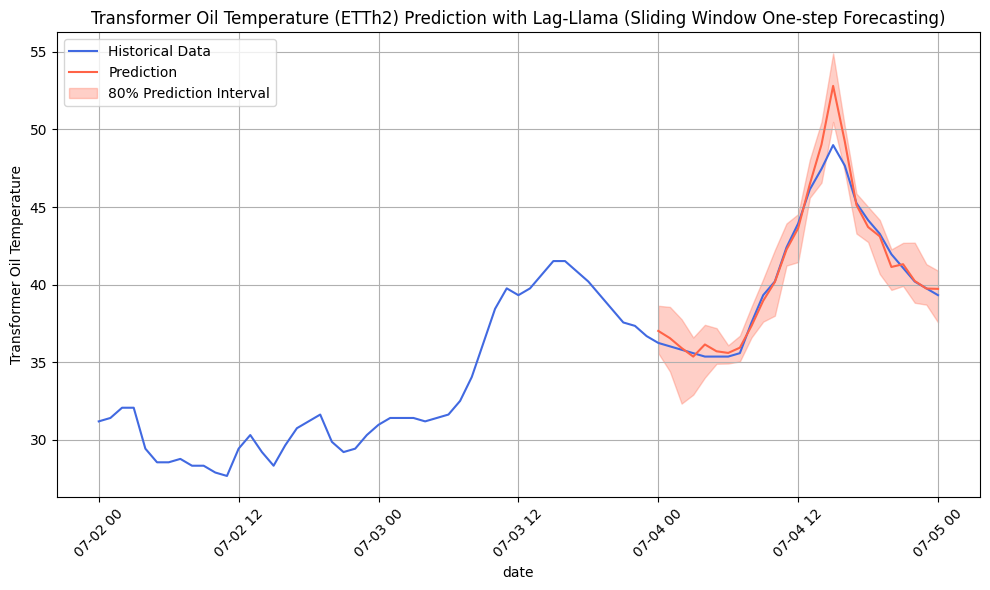

In [332]:
CONTEXT_WINDOW = 480
FORECAST_STEPS = 25 

# target_date = pd.Timestamp('2017-06-27 00:00:00')
# target_date = pd.Timestamp('2017-06-29 00:00:00')
target_date = pd.Timestamp('2017-07-04 00:00:00')
start_idx = etth2[etth2['date'] < target_date].index[-1]
print(f"Start index: {start_idx}")
# Generate forecasts using sliding window
forecasts = generate_sliding_window_forecasts(etth2, start_idx)

actual_values = etth2['OT'].iloc[start_idx + 1:start_idx + FORECAST_STEPS + 1].values
metrics = calculate_sliding_window_metrics(actual_values, forecasts['median'])

print("\nSliding Window Forecast Metrics:")
for metric_name, value in metrics.items():
    if value is not None:
        print(f"{metric_name}: {value:.4f}")
    else:
        print(f"{metric_name}: N/A")

plot_forecast_with_sliding_window(etth2, start_idx, forecasts)